![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# 0. Setup

## Libraries

In [ ]:
!git clone https://github.com/domingomery/balu3
!pip install ./balu3

Cloning into 'balu3'...
remote: Enumerating objects: 261, done.
remote: Counting objects: 100% (261/261), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 261 (delta 152), reused 177 (delta 74), pack-reused 0
Receiving objects: 100% (261/261), 68.46 KiB | 8.56 MiB/s, done.
Resolving deltas: 100% (152/152), done.
Processing ./balu3
  Preparing metadata (setup.py) ... done
  Created wheel for balu3: filename=balu3-1.0-py3-none-any.whl size=43704 sha256=f3422ffaf2f972529dce1d526ed7d1115ce0dd03223516b6f748660c25c7cb6e
  Stored in directory: /tmp/pip-ephem-wheel-cache-59cikdi7/wheels/9e/f6/a9/3d39da83a3504331129d706f5b04ceb3dbf0ec0f313cdb8fcf
Successfully built balu3


In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from   skimage.measure   import label
from   sklearn.metrics   import confusion_matrix, accuracy_score
from   balu3.fx.geo      import basicgeo,fitellipse,hugeo,flusser,gupta
from   balu3.io.plots    import plot_ellipses_image
from   balu3.io.misc     import imageload

# 1. X-ray Images

Images from [GDXray Dataset](https://domingomery.ing.puc.cl/material/gdxray/).

In [ ]:
!wget https://www.dropbox.com/s/gn55mabk2zf006m/N0001_0004b.png
!wget https://www.dropbox.com/s/87xlhbehd49fglp/N0006_0003b.png

--2023-07-18 16:43:45--  https://www.dropbox.com/s/gn55mabk2zf006m/N0001_0004b.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/gn55mabk2zf006m/N0001_0004b.png [following]
--2023-07-18 16:43:45--  https://www.dropbox.com/s/raw/gn55mabk2zf006m/N0001_0004b.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6ca63e117a686805485db3910a.dl.dropboxusercontent.com/cd/0/inline/CAEFBLASl-JF-BxCFbsFVMghU0BUFMb0hvD2PSieHn_x03rcd08YhB9aRKZSuE48v6A9QS8DGzjT6PD3ExQWdCByJ-9fhnW0lp-gjhLjFUU41-9B5k4A5jnFnp8UWMxI6k9GkFUjIimt9uj0fDT8CPYa6RLouGjZd3yvnkxpDHQCBQ/file# [following]
--2023-07-18 16:43:46--  https://uc6ca63e117a686805485db3910a.dl.dropboxusercontent.com/cd/0/inline/CAEFBLASl-JF-BxCFbsFVMghU0BUFMb0hvD2PSieHn_x03rcd08YhB9aRKZSuE48v6A9

# Example 1: Basic geometric features

In this example, we show how to extract the basic geometric features of ten segmented blocks in the X-ray image N0001_0004b.png. The segmentation in this example is performed by thresholding the X-ray image and selecting those segmented objects that present a suitable size (area).

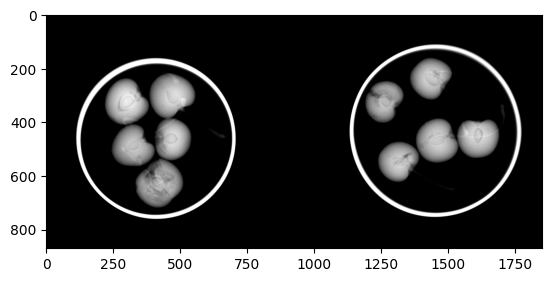

In [ ]:
# Input Image
fig    = plt.figure()
ax     = fig.add_subplot(111)
img1   = plt.imread('N0001_0004b.png')
implot = plt.imshow(img1,cmap='gray')


In [ ]:
# Input Image
img    = img1

# Segmentation
R      = img>0.27         # thresholding of light objects
L      = label(R)         # labeling of objects
n      = np.max(L)        # number of detected objects
T      = np.zeros((n,16)) # features of each object will stored in a row

# Analysis of each segmented object
t      = 0 # count of recognized fruits
for i in range(n):
    R = (L == i)*1                         # binary image of object i
    f = basicgeo(R)  # feature extraction for object i
    area = f[4]
    # recognition of fruits according to the size
    if area>14000 and area<21000:
        T[t,:] = f                         # storing the features of the fruit t
        t = t+1
        # labeling each recognized fruit in the plot
        ax.text(f[1]-20, f[0]+10, str(t), fontsize=12,color='Red')

# Display and save results
plt.show()
F = T[0:t,:]
print('Basic Geo-Features:')
print(F)
np.save('GeoFeatures.npy',F)               # save features

Basic Geo-Features:
[[ 2.37110881e+02  1.43387875e+03  1.48000000e+02  1.50000000e+02
   1.59180000e+04  4.19000000e+02  1.13938453e+00  1.00000000e+00
   1.42363714e+02  1.51618715e+02  1.35257149e+02 -6.73321530e-01
   9.80474284e-01  7.17027027e-01  4.51862841e-01  1.62350000e+04]
 [ 3.01101918e+02  4.66628467e+02  1.67000000e+02  1.64000000e+02
   1.93980000e+04  4.75000000e+02  1.08038762e+00 -1.00000000e+00
   1.57156930e+02  1.66073138e+02  1.51188773e+02 -9.95426947e-01
   9.74284279e-01  7.08266394e-01  4.13784992e-01  1.99100000e+04]
 [ 3.28325695e+02  2.97191754e+02  1.69000000e+02  1.58000000e+02
   1.91130000e+04  4.59000000e+02  1.14002232e+00  1.00000000e+00
   1.55998165e+02  1.65698708e+02  1.49042889e+02  2.88540434e-01
   9.72473797e-01  7.15789079e-01  4.36959264e-01  1.96540000e+04]
 [ 3.23035395e+02  1.26024958e+03  1.48000000e+02  1.37000000e+02
   1.43240000e+04  4.52000000e+02  8.81043409e-01  1.00000000e+00
   1.35047707e+02  1.56864124e+02  1.19141779e+02 -4.

# Example 2: Elliptical Features

In this example, we show how to extract elliptical features from the outline of a fruit. We tested this method on an X-ray of a cherry with an elliptical shape as shown in the result.

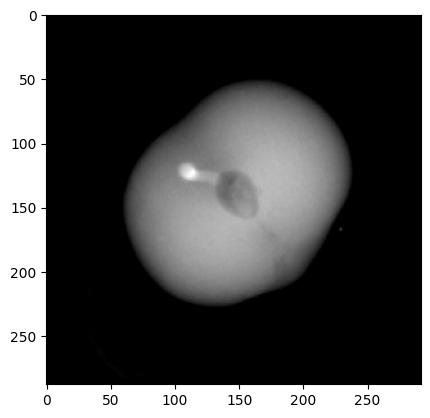

In [ ]:
# Input Image
fig    = plt.figure()
ax     = fig.add_subplot(111)
img2   = plt.imread('N0006_0003b.png')
implot = plt.imshow(img2,cmap='gray')


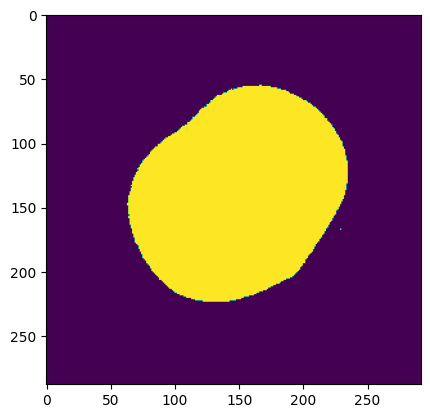

In [ ]:
img    = img2   # input image with a fruit
R = img>0.2     # segmentation
plt.imshow(R)
plt.show()

Elliptical Features:
[149.37312970213839, 140.1603157123133, 92.58829192725125, 74.15304692794592, -42.920929664569464, 0.8008901059132798, 21569.245110708223]


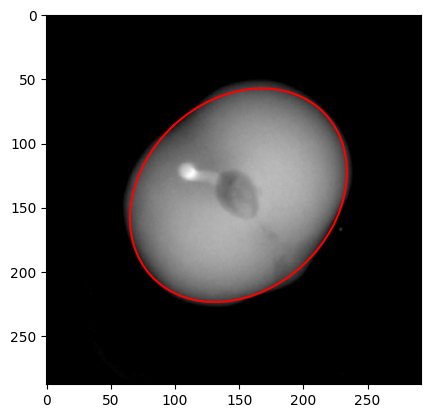

Note: The 7 values are: [Mass center: (io,jo) in pixels; Axis: (ae,be) in pixels; Orientation in grads; Eccentricity; Area in pixels]


In [ ]:
fxell  = fitellipse(R)                           # extraction of elliptical features
print('Elliptical Features:')                    # show results
print(fxell)                                     # print elliptical features
plot_ellipses_image(img,fxell)                   # draw ellipse onto image
print('Note: The 7 values are: [Mass center: (io,jo) in pixels; Axis: (ae,be) in pixels; Orientation in grads; Eccentricity; Area in pixels]')

# Example 3: Invariant moments

In this example, we show how to measure invariant moments that can be used as shape features of objects of interest. We test this method with an X-ray containing 10 apples. We superimpose on this image 4 rectangles whose size is $a \times b$ pixels (where $b=3a$). The rectangles are located in the horizontal and vertical directions, as shown in the result. Thus, we can simulate an input X-ray image containing apples and rectangles. The idea is to separate them. We see that the first Hu-moment can be used to effectively discriminate apples from rectangles.

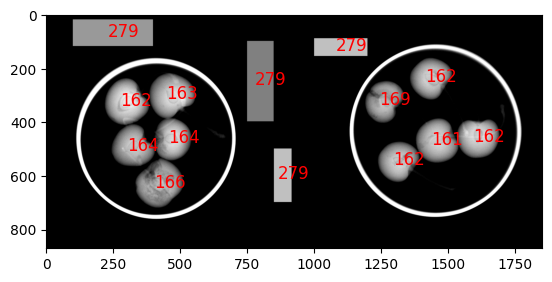

Hu Features:
[[ 2.79269844e-01  5.02170131e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.78888128e-01  5.00078881e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.79269844e-01  5.02170131e-02  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.62091387e-01  3.39641538e-04  1.01449954e-04  1.29613440e-06
  -1.32750022e-11 -2.03144012e-08  6.68412276e-12]
 [ 1.62511380e-01  2.31495542e-04  1.88649432e-04  1.69404653e-06
  -3.02449754e-11 -2.57072630e-08  1.54037077e-12]
 [ 1.62421665e-01  2.93861446e-04  1.29347691e-04  1.46554367e-06
  -1.63641293e-11 -1.07630449e-08  1.18053281e-11]
 [ 1.69301159e-01  2.06379006e-03  8.88690655e-05  2.20118391e-06
  -3.01864184e-11 -9.86463800e-08  6.04867570e-12]
 [ 1.63674728e-01  1.04829194e-03  7.22197545e-05  1.24391190e-06
  -1.02165115e-11 -3.43974286e-08  5.88439607e-12]
 [ 1.61481567e-01  2.46151206e-04  7.51875126e-05  

In [ ]:
fig    = plt.figure()
ax     = fig.add_subplot(111)
img    = img1
img[100:399,750:849]  = 0.5
img[500:699,850:916]  = 0.75
img[20:119,100:399]   = 0.6
img[90:156,1000:1199] = 0.75
implot = plt.imshow(img,cmap='gray')
R      = img>0.27   # segmentation
L      = label(R)   # labeling
n      = np.max(L)  # number of segmented objects
t      = 0
T      = np.zeros((n,7))
for i in range(n):
    R = (L == i)*1                      # binary image of object i
    f = basicgeo(R)
    area = f[4]
    # recognition of fruits according to the size
    if area>10000 and area<31000:
        h  = hugeo(R)
        T[t,:] = h
        t      = t+1
        x      = round(1000*h[0])       # first hu moment
        ax.text(f[1]-20, f[0]+10, str(int(x)), fontsize=12,color='Red')
plt.show()
F = T[0:t,:]
print('Hu Features:')
print(F)
np.save('HuFeatures.npy',F)             # save features

Note: In this example, the features (basic geometric features for centroid and area, and Hu moments) are computed by  function `extract_features` of PyXvis  with parameters `['basicgeo','hugeo']` and `bw=R`, where `R` is the binary image from which the features are extracted. The output of this function is a vector `f` computed by concatenation of two vectors, one for the basic geometric features (of 18 elements) and one for the Hu moments (of 7 elements). Thus, the first Hu moment is stored in `f[18]`. The reader can test Flusser and Gupta moments using functions parameters `'flusser'` and `'gupta'` respectively in function `extract_features`.

# Example 4: Recognition of Arrows

In this example, three types of arrows are recognized as shown in the figure. The arrows are of different sizes and different orientations.

* Class 0: curved unidirectional arrow

* Class 1: bidirectional straight arrow

* Class 2: unidirectional straight arrow

The Hu moments are used for the solution since they are invariant to rotation and scale.

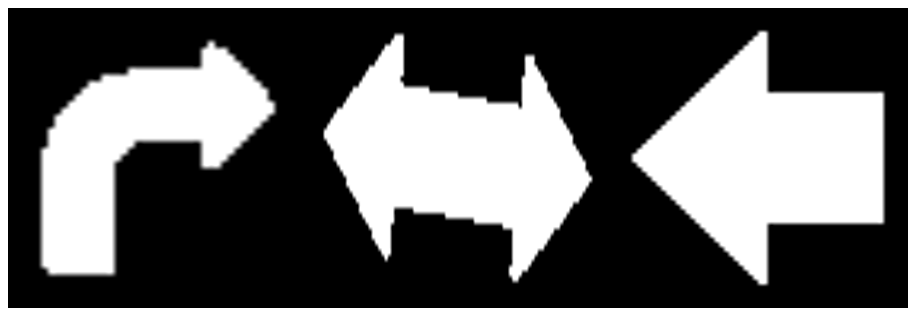

In [ ]:
# Training subset: 3 classes and 12 images per class

!wget https://www.dropbox.com/s/b78g10rx0wf6ruo/arrows_training.zip
!unzip -qq arrows_training


--2023-07-18 16:44:00--  https://www.dropbox.com/s/b78g10rx0wf6ruo/arrows_training.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/b78g10rx0wf6ruo/arrows_training.zip [following]
--2023-07-18 16:44:00--  https://www.dropbox.com/s/raw/b78g10rx0wf6ruo/arrows_training.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc76efc9a5784b7d5075c9f55894.dl.dropboxusercontent.com/cd/0/inline/CAF_AZOb8XjSjb1eGVAKf6kiLrZwa6TnTgYeZvkYYZIGVEHuovOgJR0KAwnzS4nsUd7aGXGqWkLA8lQ-HH2e7XNSGh8gURT0TggSSEiXkIlrMamoQGAx-LVX83ZbzMESgKOylFKc24rB2Hpi7F4oXELJAhsqoZdvtXax8SyL6SqmuQ/file# [following]
--2023-07-18 16:44:01--  https://uc76efc9a5784b7d5075c9f55894.dl.dropboxusercontent.com/cd/0/inline/CAF_AZOb8XjSjb1eGVAKf6kiLrZwa6TnTgYeZvkYYZIGVEHuovOgJR0K

In [ ]:
# Testing subset: 3 classes and 10 images per clase

!wget https://www.dropbox.com/s/mjtb72kwu7hwkhn/arrows_testing.zip
!unzip -qq arrows_testing

--2023-07-18 16:44:02--  https://www.dropbox.com/s/mjtb72kwu7hwkhn/arrows_testing.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/mjtb72kwu7hwkhn/arrows_testing.zip [following]
--2023-07-18 16:44:02--  https://www.dropbox.com/s/raw/mjtb72kwu7hwkhn/arrows_testing.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc70dbc4c166ac47573cabdc7765.dl.dropboxusercontent.com/cd/0/inline/CAGfhex88nFWzMF8WsVKS0UMU5dB58E4BIKDjiFHdaAAAgG64kiRGR8SJGp-lVUjC0AQWIcTlLcVsoDPaAqfFLGRztb_9mvnxBHEYKAzEXyJANdpK4EphEFRQA0lRhufZVAxLHEwSY_yJm1OFGavtRckyZRBs_HpJ3MaBxrkNuCJFQ/file# [following]
--2023-07-18 16:44:03--  https://uc70dbc4c166ac47573cabdc7765.dl.dropboxusercontent.com/cd/0/inline/CAGfhex88nFWzMF8WsVKS0UMU5dB58E4BIKDjiFHdaAAAgG64kiRGR8SJGp

In [ ]:
# TRAINING

K = 3  # number of classes
N = 12 # number of images per class

M  = 7    # Hu moments are 7
#M  = 4   # Flusser moments are 4
#M  = 3   # Gupta moments are 3


Xtrain = np.zeros((K*N,M))          # K x N samples and  M features
ytrain_gt = np.zeros((K*N,))        # ground truth

t = 0
for j in range(K):
  for i in range(N):

    img    = imageload('arrows_training/arrow',j+1,2,i+1,2)
    R      = (img>0.5)*1            # segmentation
    f = hugeo(R)      # feature extraction
    #f = flusser(R)   # feature extraction
    #f = gupta(R)     # feature extraction
    Xtrain[t,:] = f
    ytrain_gt[t] = j
    t = t+1


In [ ]:
# TESTING

Nt = 10

Xtest = np.zeros((K*Nt,M))          # features
ytest_gt = np.zeros((K*Nt,))        # ground truth

t = 0
for j in range(K):
  for i in range(Nt):
    img    = imageload('arrows_testing/arrow',j+1,2,i+1,2)
    R      = (img>0.5)*1            # segmentation
    f = hugeo(R)   # feature extraction
    #f = flusser(R)   # feature extraction
    #f = gupta(R)   # feature extraction
    Xtest[t,:] = f
    ytest_gt[t] = j
    t = t+1


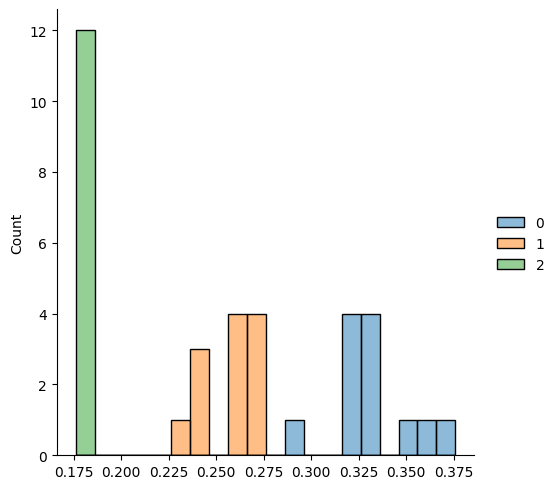

In [ ]:
# Frequency distribution by class
# Hu moments are 7, and they have been stored as 7 columns in the matrix
# Xtrain, the first Hu moment is column zero:
mm = 0 # 0 is the first moment, 1 is the second one, etc.!
sns.displot([Xtrain[0:12,mm],Xtrain[12:24,mm],Xtrain[24:36,mm]],bins=20)


In [ ]:
# Classification
# Clearly the classes are separated with two thresholds which in this case are chosen
# manually:

th1 = 0.20
th2 = 0.28

xtest  = Xtest[:,mm]
n = K*Nt
ytest  = np.zeros((n,))
for i in range(n):
  if xtest[i]<th1:
    ytest[i] = 2
  elif xtest[i]<th2:
    ytest[i] = 1


In [ ]:
# Performance

C = confusion_matrix(ytest_gt, ytest)
print('Confusion Matrix:')
print(C)
print(' ')
Acc = accuracy_score(ytest_gt, ytest)
print('Accuracy:')
print(Acc)


Confusion Matrix:
[[10  0  0]
 [ 0 10  0]
 [ 0  0 10]]
 
Accuracy:
1.0
